In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



In [2]:
#technology = "microarray" # "RNAseq"
technology = "RNAseq" #microarray

In [3]:

# Assuming your DataFrame is called cts and has gene expression data
# Assuming cts is a pandas DataFrame with gene expression data
if technology == "microarray":
    cts = pd.read_csv("/home/karen/Documents/phd/Data/trainign_dataset_51270_microarray_unadjusted.csv")
elif technology == "RNAseq":
    cts = pd.read_csv("Data/RNAseq_All_counts_unadjusted_integer.csv")

metadata =   cts[["Experiment", "Sample", "Age", "Status", "Sex"]]


/tmp/ipykernel_19350/2341363449.py:6: DtypeWarning: Columns (34507) have mixed types. Specify dtype option on import or set low_memory=False.
  cts = pd.read_csv("Data/RNAseq_All_counts_unadjusted_integer.csv")


In [4]:
metadata

,Experiment,Sample,Age,Status,Sex
0,GSE167186,SRR13758984,91.0,Sarcopenia,NaN
1,GSE167186,SRR13758985,86.0,Healthy,male
2,GSE167186,SRR13758986,69.0,Healthy,male
3,GSE167186,SRR13758987,83.0,Sarcopenia,NaN
4,GSE167186,SRR13758988,71.0,UNCLASSIFIED,NaN
...,...,...,...,...,...
265,GSE60590,SRR1555210,27.5,trained,male
266,GSE60590,SRR1555211,27.5,untrained,male
267,GSE60590,SRR1555212,27.5,trained,male
268,GSE60590,SRR1555213,27.5,trained,male


# Function

In [5]:
import matplotlib.pyplot as plt

def generate_colors(n):
        colormap = plt.cm.get_cmap('tab20', n)
        colors = [colormap(i) for i in range(n)]
        return colors
    
def blot_expression(subset_data, experiments, count_experiments, colors=None, title=None, save=False):
    
    if colors is None:
        colors = generate_colors(len(experiments))
    colored = np.sum(list(count_experiments.values()))
    if len(subset_data.columns) != colored:
        raise "the columns and the experiments should be same length"
        return None
    if len(count_experiments) != len(experiments):
        raise "the count_experiments and the experiments should be same length"
        return None
    if title is None:
        title = 'Expression of Gene Expression Across Experiments'
    boxes=[]
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    start_c = 0
    end_c = len(subset_data.columns)
    color_i = 0
    for exp in experiments:
        end_c=start_c + count_experiments[exp]
        # Boxplot for the first 84 columns
        box= ax.boxplot(subset_data.iloc[:, start_c:end_c], positions=list(range(start_c+1,end_c+1)), showfliers=False, patch_artist=True,
                          boxprops=dict(facecolor=colors[color_i], color=colors[color_i])
                          )
        start_c = end_c
        boxes.append(box)
        color_i=color_i+1
                          
    
    # Set labels and titles
    ax.set_title(title)
    ax.set_ylabel('Expression')
    
    # Adjust legend
    legends_list = [b["boxes"][0] for b in boxes]
    ax.legend(legends_list, experiments)
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()


In [6]:
cts

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Age,Status,Sex,Experiment,Sample
0,30193070.0,0.0,5000000.0,0.0,1915360.0,0.000000e+00,2.400002e+07,0.0,8.896791e+06,0.0,...,0.0,0.0,0.0,8.976130e+06,0.0,91.0,Sarcopenia,NaN,GSE167186,SRR13758984
1,9888910.0,0.0,6000000.0,0.0,0.0,0.000000e+00,1.799996e+07,0.0,2.495227e+03,2000000.0,...,0.0,0.0,0.0,6.803160e+06,0.0,86.0,Healthy,male,GSE167186,SRR13758985
2,4293990.0,0.0,1000000.0,0.0,1000000.0,0.000000e+00,7.000000e+06,1000000.0,3.136994e+06,1000000.0,...,0.0,0.0,0.0,1.322720e+06,0.0,69.0,Healthy,male,GSE167186,SRR13758986
3,20027300.0,0.0,4000000.0,0.0,0.0,0.000000e+00,1.599999e+07,0.0,4.000000e+06,1999998.0,...,0.0,0.0,0.0,7.149970e+06,0.0,83.0,Sarcopenia,NaN,GSE167186,SRR13758987
4,2840630.0,0.0,5999998.0,1227670.0,0.0,0.000000e+00,1.699999e+07,4000000.0,5.000000e+06,0.0,...,0.0,0.0,0.0,6.859870e+06,0.0,71.0,UNCLASSIFIED,NaN,GSE167186,SRR13758988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,38694780.0,0.0,132999790.0,30940940.0,9638110.0,5.000000e+06,9.736185e+07,32193190.0,4.414492e+07,58999998.0,...,0.0,0.0,0.0,0.000000e+00,5351828.0,27.5,trained,male,GSE60590,SRR1555210
266,62483025.2,0.0,335999650.0,109989130.0,13437230.0,8.000002e+06,1.751153e+08,57687390.0,1.813015e+08,118999670.0,...,2118550.0,0.0,0.0,0.000000e+00,0.0,27.5,untrained,male,GSE60590,SRR1555211
267,65522510.0,0.0,318999680.0,66454730.0,17974360.0,1.611355e+06,1.950604e+08,73321380.0,1.176794e+08,126000000.0,...,1000000.0,0.0,1040940.0,5.101440e+03,5952181.0,27.5,trained,male,GSE60590,SRR1555212
268,41195020.0,2602330.0,187000420.0,58094879.0,12168960.0,2.198673e+07,9.200002e+07,51406260.0,8.083574e+07,71000000.0,...,1026380.0,0.0,0.0,0.000000e+00,0.0,27.5,trained,male,GSE60590,SRR1555213


In [7]:
sample_order = cts["Sample"].tolist()  # Get the order of samples in cts
experiment_order = cts["Experiment"].tolist() 
age_order = cts["Age"].tolist()


In [8]:
df =pd.DataFrame(experiment_order)
count_experiments = dict(df[0].value_counts())
count_experiments
experiments = list(count_experiments)
experiments

['GSE157585', 'GSE167186', 'GSE164471', 'GSE60590', 'GSE129643', 'GSE152558']

In [9]:
def map_to_category(age):
    if age <= 35:
        return "Young"
    elif age > 65:
        return "Old"
    else:
        return "MiddleAge"

# Map values in age_order to categories
age_order = [map_to_category(age) for age in age_order]

In [10]:
cts_processed.columns

NameError: name 'cts_processed' is not defined

In [16]:
cts_processed = cts.copy()
#
if technology == "microarray":
    cts_processed.drop(['Age', 'Sex', 'Status', 'Experiment'], axis=1, inplace=True)
elif technology == "RNAseq":
    cts_processed.drop(['Age', 'Experiment', 'Sex', 'Status'], axis=1, inplace=True)
cts_processed.set_index("Sample",  inplace=True)

In [40]:
#!pip install combat
#!pip install inmoose


  Using cached inmoose-0.6.0.tar.gz (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.0/195.0 kB 1.1 MB/s eta 0:00:00a 0:00:01m
  Created wheel for inmoose: filename=inmoose-0.6.0-cp311-cp311-linux_x86_64.whl size=4417983 sha256=57fe3184f60b3a51dd08511a03d09ded911445618a29a401f944a20f44e6cb32
  Stored in directory: /home/correction/.cache/pip/wheels/c6/8a/a7/ff795f8b240718994bed119b184ad2bcacd9b9511c2c907c40
Successfully built inmoose


In [11]:
from combat.pycombat import pycombat
data = cts.copy()

# Extract batch information into a separate variable
# Replace 'batch_column_name' with the name of the column containing batch information
batch_info = data['Experiment']
age_list = data["Age"]
# Remove the batch column from the data
if technology == "microarray":
    data.drop(['Age', 'Sex', 'Status', 'Experiment'], axis=1, inplace=True)

elif technology == "RNAseq":
    data.drop(['Age', 'Experiment','Sex', 'Status'], axis=1, inplace=True)


data.set_index("Sample", inplace=True)


In [12]:
data= data.T

In [13]:
raw_data = data.copy()
data

Sample,SRR13758984,SRR13758985,SRR13758986,SRR13758987,SRR13758988,SRR13758989,SRR13758990,SRR13758991,SRR13758992,SRR13758993,...,SRR1555205,SRR1555206,SRR1555207,SRR1555208,SRR1555209,SRR1555210,SRR1555211,SRR1555212,SRR1555213,SRR1555214
ENSG00000000003.14,30193070.0,9888910.0,4293990.0,20027300.0,2840630.0,9099530.0,11248420.0,6018710.0,10679100.0,4807490.0,...,1.068329e+08,62199450.0,74153180.0,24709900.0,9200010.0,38694780.0,62483025.2,6.552251e+07,41195020.0,1.715508e+07
ENSG00000000005.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2602330.0,0.000000e+00
ENSG00000000419.12,5000000.0,6000000.0,1000000.0,4000000.0,5999998.0,3999998.0,4000000.0,6000000.0,2000000.7,5000000.0,...,5.130004e+08,259000050.0,238000500.0,143999910.0,45000030.0,132999790.0,335999650.0,3.189997e+08,187000420.0,1.299996e+08
ENSG00000000457.13,0.0,0.0,0.0,0.0,1227670.0,0.0,0.0,0.0,34244.6,0.0,...,1.227022e+08,53100019.9,56574660.0,32053400.0,12155800.0,30940940.0,109989130.0,6.645473e+07,58094879.0,3.457720e+07
ENSG00000000460.16,1915360.0,0.0,1000000.0,0.0,0.0,605967.0,0.0,0.0,1000000.0,118220.0,...,2.704215e+07,16036000.0,15471800.0,6728030.0,2761520.0,9638110.0,13437230.0,1.797436e+07,12168960.0,8.128640e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285480.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.086820e+06,3060020.0,0.0,1103050.0,0.0,0.0,2118550.0,1.000000e+06,1026380.0,1.052230e+06
ENSG00000285491.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
ENSG00000285505.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.0,1045890.0,0.0,0.0,1.040940e+06,0.0,0.000000e+00
ENSG00000285508.1,8976130.0,6803160.0,1322720.0,7149970.0,6859870.0,9197040.0,6246120.0,0.0,8782220.0,3244960.0,...,0.000000e+00,0.0,0.0,0.0,686634.0,0.0,0.0,5.101440e+03,0.0,6.547810e-01


In [19]:
colors=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']

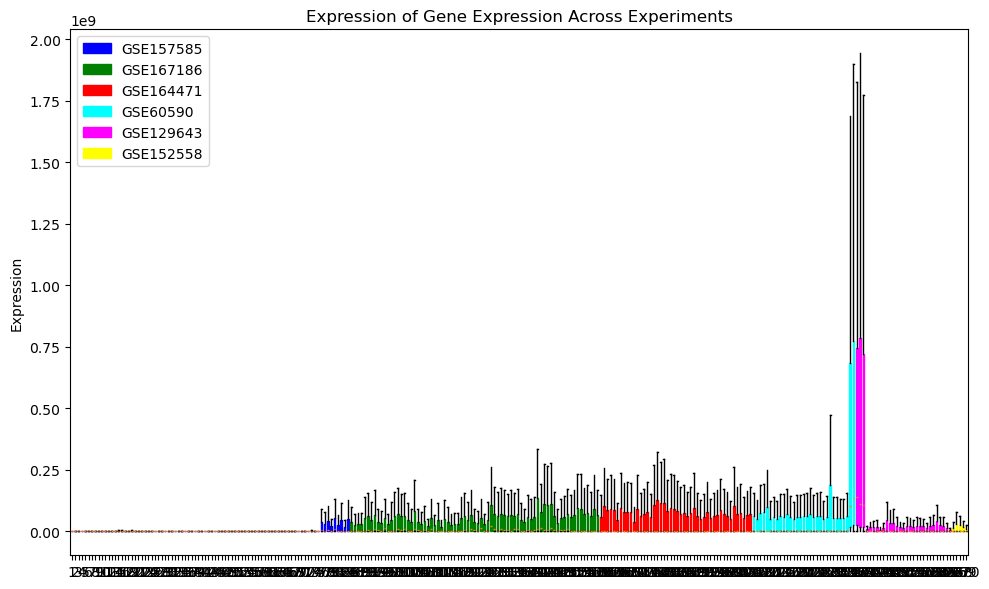

In [29]:

blot_expression(data, experiments, count_experiments, colors=colors, save=f"Plots/expression_distribution_{technology}_unalteraded.png")



In [30]:

data = (data - data.mean()) / data.std()

data.fillna(0, inplace=True)

In [31]:
data.columns

Index(['SRR13758984', 'SRR13758985', 'SRR13758986', 'SRR13758987',
       'SRR13758988', 'SRR13758989', 'SRR13758990', 'SRR13758991',
       'SRR13758992', 'SRR13758993',
       ...
       'SRR1555205', 'SRR1555206', 'SRR1555207', 'SRR1555208', 'SRR1555209',
       'SRR1555210', 'SRR1555211', 'SRR1555212', 'SRR1555213', 'SRR1555214'],
      dtype='object', name='Sample', length=270)

In [32]:
data[data.isna().any(axis=1)]

Sample,SRR13758984,SRR13758985,SRR13758986,SRR13758987,SRR13758988,SRR13758989,SRR13758990,SRR13758991,SRR13758992,SRR13758993,...,SRR1555205,SRR1555206,SRR1555207,SRR1555208,SRR1555209,SRR1555210,SRR1555211,SRR1555212,SRR1555213,SRR1555214


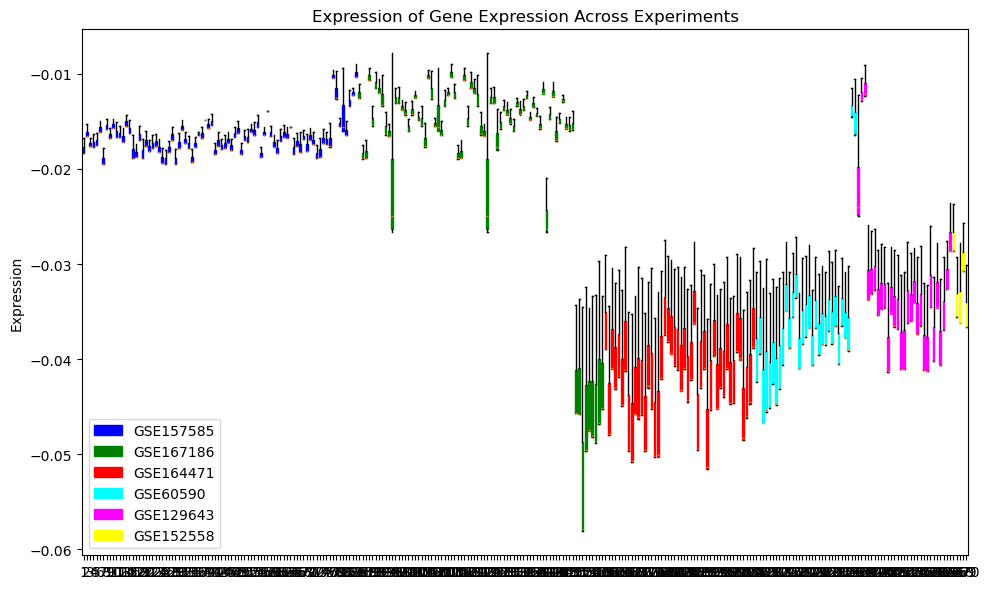

In [34]:
blot_expression(data, experiments, count_experiments, colors=colors, save=f"Plots/expression_distribution_{technology}_combat_normalized.png")

In [ ]:
age_list

In [ ]:
batch_info

In [ ]:
data

In [35]:
data_corrected = pycombat(data=data,batch=batch_info, mod=[], precision=0.1)



Found 6 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [44]:
from inmoose.pycombat import pycombat_norm, pycombat_seq

inmose_data_corrected = pycombat_seq(raw_data, batch_info)


[INFO] Found 6 batches
[INFO] Adjusting for 0 covariate(s) or covariate level(s)
[INFO] Estimating dispersions
[INFO] Fitting the GLM model
[INFO] shrinkage off - using GLM estimates for parameters
[WARNING] /opt/conda/lib/python3.11/site-packages/inmoose/pycombat/pycombat_seq.py:199: RuntimeWarning: divide by zero encountered in log
  np.log(mu_hat[:, batches_ind[b]])

[INFO] Adjusting the data


In [62]:
inmose_data_corrected = inmose_data_corrected.T

In [70]:
inmose_data_corrected = inmose_data_corrected.astype(int)

In [76]:
inmose_data_corrected.describe()

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285470.1,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Age
count,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,...,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,270.000000
mean,1.417951e+08,3.480794e+05,2.125580e+08,2.407374e+07,4.794097e+07,3.468806e+06,3.907788e+08,1.020832e+08,1.483670e+08,1.094495e+08,...,1.852431e+05,3.319537e+06,1.782573e+06,9.972321e+05,1.313777e+06,1.826075e+06,3.430084e+05,1.178430e+07,1.768348e+07,53.384444
std,1.918488e+08,1.110282e+06,4.051173e+08,1.106575e+08,1.195960e+08,2.825837e+07,5.379762e+08,1.735652e+08,2.356484e+08,3.728852e+08,...,1.156245e+06,1.735173e+07,9.444399e+06,5.246489e+06,5.431044e+06,1.141979e+07,1.351544e+06,3.385360e+07,6.757440e+07,22.386252
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.401386e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,18.000000
25%,1.177848e+07,0.000000e+00,1.849366e+07,1.000000e+00,1.424336e+06,0.000000e+00,3.264584e+07,1.035705e+07,1.334751e+07,2.349187e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,27.500000
50%,1.072592e+08,0.000000e+00,1.364579e+08,7.005000e+03,1.106465e+07,1.000000e+00,3.020072e+08,5.426948e+07,7.849509e+07,1.823122e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.246500e+03,3.536945e+06,65.500000
75%,2.013012e+08,7.500000e-01,2.755796e+08,7.528092e+06,4.029620e+07,9.000000e+00,5.263323e+08,1.202881e+08,1.926789e+08,9.208894e+07,...,0.000000e+00,1.451228e+06,0.000000e+00,1.050000e+01,3.096750e+03,0.000000e+00,0.000000e+00,2.567846e+06,1.152389e+07,71.000000
max,1.666539e+09,8.437511e+06,5.259272e+09,1.429123e+09,1.347640e+09,4.114512e+08,4.473997e+09,1.797260e+09,2.181712e+09,5.605136e+09,...,1.632000e+07,1.746490e+08,1.102960e+08,5.589729e+07,4.576003e+07,1.236260e+08,1.250490e+07,3.141067e+08,7.023181e+08,92.000000


In [71]:
inmose_data_corrected.head()

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285458.1,ENSG00000285470.1,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13758984,21281762,0,15759712,0,11295483,0,35294310,0,18333093,0,...,12741169,0,0,0,0,0,0,0,2773,0
SRR13758985,8542646,0,15035432,0,0,0,26637602,0,1389125,15716930,...,10663212,0,0,0,0,0,0,0,1328,0
SRR13758986,4079945,0,5410942,0,5658191,0,10946301,4491317,7747412,9046855,...,4248288,0,0,0,0,0,0,0,1,0
SRR13758987,14758557,0,12809471,0,0,0,24093106,0,11562944,16086208,...,10497182,0,0,0,0,0,0,0,1614,0
SRR13758988,3623061,0,15529838,23957067,0,0,25492722,10773730,12889518,0,...,10506926,0,0,0,0,0,0,0,795,0


In [55]:
metadata = cts[['Age', 'Experiment','Sex', 'Status', 'Sample']]
metadata = metadata.set_index('Sample')
metadata

,Age,Experiment,Sex,Status
Sample,,,,
SRR13758984,91.0,GSE167186,NaN,Sarcopenia
SRR13758985,86.0,GSE167186,male,Healthy
SRR13758986,69.0,GSE167186,male,Healthy
SRR13758987,83.0,GSE167186,NaN,Sarcopenia
SRR13758988,71.0,GSE167186,NaN,UNCLASSIFIED
...,...,...,...,...
SRR1555210,27.5,GSE60590,male,trained
SRR1555211,27.5,GSE60590,male,untrained
SRR1555212,27.5,GSE60590,male,trained


In [77]:
inmose_data_corrected = inmose_data_corrected.merge(metadata[['Age', 'Experiment','Sex', 'Status']], left_index=True, right_index=True)

In [79]:
inmose_data_corrected

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285508.1,ENSG00000285509.1,Age_x,Experiment_x,Sex_x,Status_x,Age_y,Experiment_y,Sex_y,Status_y
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13758984,21281762,0,15759712,0,11295483,0,35294310,0,18333093,0,...,2773,0,91.0,GSE167186,NaN,Sarcopenia,91.0,GSE167186,NaN,Sarcopenia
SRR13758985,8542646,0,15035432,0,0,0,26637602,0,1389125,15716930,...,1328,0,86.0,GSE167186,male,Healthy,86.0,GSE167186,male,Healthy
SRR13758986,4079945,0,5410942,0,5658191,0,10946301,4491317,7747412,9046855,...,1,0,69.0,GSE167186,male,Healthy,69.0,GSE167186,male,Healthy
SRR13758987,14758557,0,12809471,0,0,0,24093106,0,11562944,16086208,...,1614,0,83.0,GSE167186,NaN,Sarcopenia,83.0,GSE167186,NaN,Sarcopenia
SRR13758988,3623061,0,15529838,23957067,0,0,25492722,10773730,12889518,0,...,795,0,71.0,GSE167186,NaN,UNCLASSIFIED,71.0,GSE167186,NaN,UNCLASSIFIED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1555210,37402439,0,21355420,1,1212397,1,87213838,3370216,5884457,951798,...,0,5351828,27.5,GSE60590,male,trained,27.5,GSE60590,male,trained
SRR1555211,48027788,0,89024445,1348907,24399,1,148387777,3685378,113719675,2233983,...,0,0,27.5,GSE60590,male,untrained,27.5,GSE60590,male,untrained
SRR1555212,84899250,0,167383416,407713,37284600,1,219777948,58357903,79405469,147215871,...,12712840,5952181,27.5,GSE60590,male,trained,27.5,GSE60590,male,trained


In [15]:
pwd

'/home/karen/Documents/GitHub/batch_correction'

In [78]:
inmose_data_corrected.to_csv(f"Results/{technology}_abundances_adjusted_combat_inmose.csv")

In [25]:
inmose_data_corrected = pd.read_csv(f"Results/{technology}_abundances_adjusted_combat_inmose.csv", index_col=0)

/tmp/ipykernel_19350/1882651272.py:1: DtypeWarning: Columns (34508) have mixed types. Specify dtype option on import or set low_memory=False.
  inmose_data_corrected = pd.read_csv(f"Results/{technology}_abundances_adjusted_combat_inmose.csv", index_col=0)


In [26]:
inmose_data_corrected= inmose_data_corrected.T[:-4]
inmose_data_corrected

Sample,SRR13758984,SRR13758985,SRR13758986,SRR13758987,SRR13758988,SRR13758989,SRR13758990,SRR13758991,SRR13758992,SRR13758993,...,SRR1555205,SRR1555206,SRR1555207,SRR1555208,SRR1555209,SRR1555210,SRR1555211,SRR1555212,SRR1555213,SRR1555214
ENSG00000000003.14,21281762,8542646,4079945,14758557,3623061,8157761,9214823,5487854,9402129,4913805,...,118055678,79308054,106832533,15352335,5351718,37402439,48027788,84899250,35885217,10643864
ENSG00000000005.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1428536,0
ENSG00000000419.12,15759712,15035432,5410942,12809471,15529838,12975244,11986876,12887869,10411178,12984667,...,203866458,105839176,81618925,31604496,5910501,21355420,89024445,167383416,44248179,46372444
ENSG00000000457.13,0,0,0,0,23957067,0,0,0,9979835,0,...,125248,161,1130,1,1,1,1348907,407713,19331,129439
ENSG00000000460.16,11295483,0,5658191,0,0,6976439,0,0,8660683,3924230,...,12188716,22266495,15332510,28383,21491,1212397,24399,37284600,2896856,7344040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285480.1,0,0,0,0,0,0,0,0,0,0,...,1769344,3952933,0,1060899,0,0,1956002,824055,873096,1146976
ENSG00000285491.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285505.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1045890,0,0,1040940,0,0
ENSG00000285508.1,2773,1328,1,1614,795,17171,1172,0,4770,1,...,0,0,0,0,24269813,0,0,12712840,0,0


In [36]:
data_corrected

Sample,SRR13758984,SRR13758985,SRR13758986,SRR13758987,SRR13758988,SRR13758989,SRR13758990,SRR13758991,SRR13758992,SRR13758993,...,SRR1555205,SRR1555206,SRR1555207,SRR1555208,SRR1555209,SRR1555210,SRR1555211,SRR1555212,SRR1555213,SRR1555214
ENSG00000000003.14,-0.009092,-0.018887,-0.022249,-0.012509,-0.025370,-0.019319,-0.019761,-0.019427,-0.019583,-0.021084,...,-0.019387,-0.022987,-0.018590,-0.020445,-0.017043,-0.015147,-0.022306,-0.019283,-0.017531,-0.024186
ENSG00000000005.5,-0.028609,-0.025270,-0.027307,-0.027350,-0.026941,-0.024301,-0.030861,-0.023821,-0.025614,-0.023448,...,-0.025387,-0.031332,-0.027715,-0.023436,-0.019609,-0.019515,-0.026311,-0.026982,-0.021347,-0.027433
ENSG00000000419.12,-0.007677,-0.007041,-0.007851,-0.007550,-0.007263,-0.007216,-0.007876,-0.006639,-0.007631,-0.006896,...,-0.005216,-0.005068,-0.006398,-0.008418,-0.009442,-0.008915,-0.007866,-0.002501,-0.007908,-0.006101
ENSG00000000457.13,-0.022784,-0.020731,-0.021983,-0.022010,-0.021013,-0.020135,-0.024169,-0.019840,-0.020924,-0.019611,...,-0.020519,-0.026110,-0.023008,-0.021377,-0.018354,-0.018530,-0.020575,-0.021274,-0.017903,-0.021742
ENSG00000000460.16,-0.022935,-0.022417,-0.022516,-0.023065,-0.022938,-0.021942,-0.024159,-0.021965,-0.022253,-0.021810,...,-0.021101,-0.026121,-0.022994,-0.019883,-0.016306,-0.015965,-0.022603,-0.022045,-0.017819,-0.022769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285480.1,-0.028560,-0.025203,-0.027251,-0.027295,-0.026884,-0.024229,-0.030825,-0.023747,-0.025549,-0.023371,...,-0.025155,-0.030692,-0.027577,-0.023199,-0.019595,-0.019502,-0.026032,-0.026729,-0.021483,-0.027045
ENSG00000285491.1,-0.028541,-0.025251,-0.027258,-0.027301,-0.026898,-0.024297,-0.030760,-0.023824,-0.025590,-0.023456,...,-0.025361,-0.031243,-0.027664,-0.023432,-0.019646,-0.019552,-0.026275,-0.026939,-0.021659,-0.027385
ENSG00000285505.1,-0.028635,-0.025187,-0.027290,-0.027335,-0.026913,-0.024186,-0.030960,-0.023691,-0.025542,-0.023305,...,-0.025396,-0.031327,-0.027719,-0.023450,-0.019278,-0.019539,-0.026318,-0.026855,-0.021663,-0.027437
ENSG00000285508.1,-0.025642,-0.024555,-0.027679,-0.025288,-0.025355,-0.023322,-0.026676,-0.027100,-0.024319,-0.025286,...,-0.024200,-0.029828,-0.026404,-0.022354,-0.018510,-0.018641,-0.025075,-0.025710,-0.020657,-0.026137


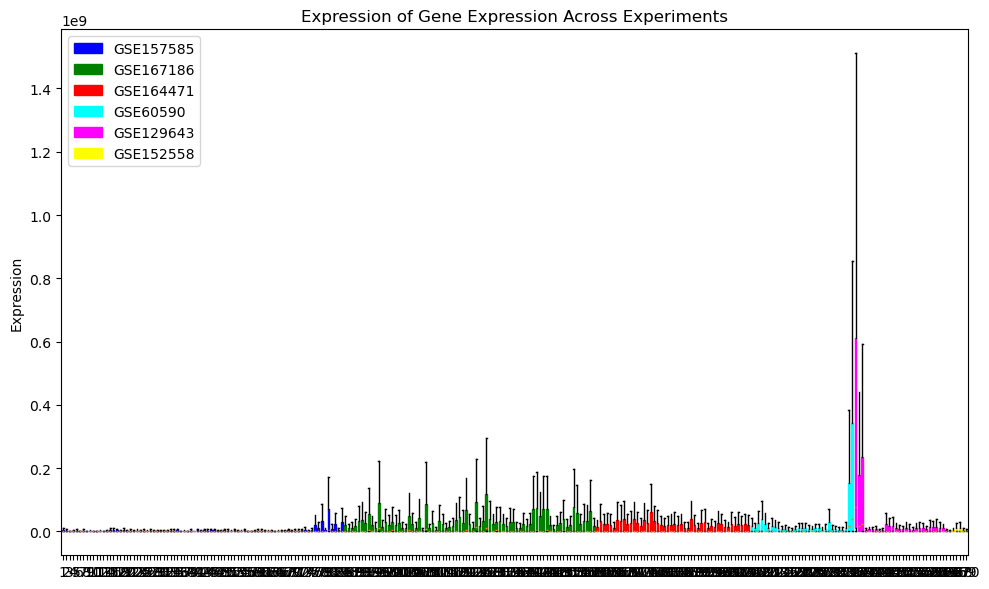

In [28]:
blot_expression(inmose_data_corrected, experiments, count_experiments, colors=colors, save=f"Plots/expression_distribution_{technology}_adjustedCombat_inmose.png")

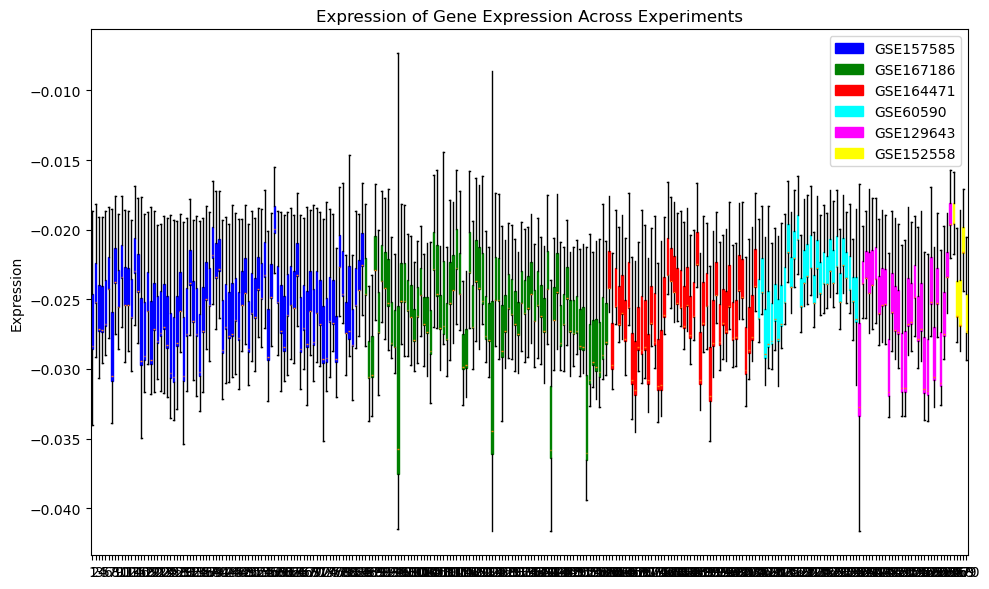

In [37]:
blot_expression(data_corrected, experiments, count_experiments, colors=colors, save=f"Plots/expression_distribution_{technology}_adjustedCombat.png")

In [ ]:
#blot_expression(data_corrected, experiments, count_experiments, colors=["blue", "green", "orange", "pink","red","purple"])

In [38]:
data_corrected = data_corrected.T

# Testing batch correction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set significance threshold (alpha level)

def plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05):
    # Plot histograms of p-values before and after batch correction
    plt.figure(figsize=(10, 5))
    plt.hist(p_values_before, bins=50, color='blue', alpha=0.5, label='Before Correction')
    plt.hist(p_values_after, bins=50, color='green', alpha=0.5, label='After Correction')
    plt.axvline(alpha, color='red', linestyle='--', label='Significance Threshold')
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.title('Distribution of p-values before and after batch correction')
    plt.legend()
    plt.show()
    
    # Perform Kolmogorov-Smirnov test to compare distributions of p-values
    ks_stat, ks_p_value = ks_2samp(p_values_before, p_values_after)
    print("Kolmogorov-Smirnov test p-value:", ks_p_value)
    
    # Check if more p-values fall below the significance threshold after batch correction
    num_sig_before = np.sum(p_values_before < alpha)
    num_sig_after = np.sum(p_values_after < alpha)
    
    print("Number of significant p-values before correction:", num_sig_before)
    print("Number of significant p-values after correction:", num_sig_after)

def see_distribution(p_values_before, p_values_after):

    # Plot histograms of p-values before and after batch correction
    plt.figure(figsize=(10, 5))
    sns.histplot(p_values_before, bins=50, color='blue', kde=True, label='Before Correction')
    sns.histplot(p_values_after, bins=50, color='green', kde=True, label='After Correction')
    plt.axvline(alpha, color='red', linestyle='--', label='Significance Threshold')
    plt.xlabel('p-value')
    plt.ylabel('Density')
    plt.title('Distribution of p-values before and after batch correction')
    plt.legend()
    plt.show()


In [ ]:
def get_ks_values_before_after(data, data_corrected, experiment_1, experiment_2):
    data_before = data.copy()
    data_before = data_before.T
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    ks_stat_before, ks_p_value_before = ks_2samp(group_a_samples_before, group_b_samples_before)

    data_corrected.reset_index(drop=True, inplace=True)

    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    _, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    ks_stat_after, ks_p_value_after = ks_2samp(group_a_samples_corrected, group_b_samples_corrected)

    return ks_p_value_before, ks_p_value_after




In [ ]:
def get_p_values_before_after(data, data_corrected, experiment_1, experiment_2):
    data_before = data.copy()
    data_before = data_before.T
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)

    data_corrected.reset_index(drop=True, inplace=True)

    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    _, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)

    return p_values_before, p_values_after

In [ ]:
experiment_list = experiments
experiments

In [ ]:
experiment_1 = experiments[0]
experiment_2 = experiments[1]

In [ ]:
# Perform differential expression analysis after batch correction



In [ ]:
p_values_before, p_values_after = get_p_values_before_after(data, data_corrected, experiment_1, experiment_2)

In [ ]:
p_values_before

In [ ]:
p_values_after

In [ ]:
plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [ ]:
p_values_after

## Getting all the experiments p_values


In [ ]:
import itertools


In [ ]:
expriments_pvalue_before=[]
expriments_pvalue_after=[]
combination_list = []
ks_stats =  []

for experiment_1, experiment_2 in itertools.combinations(experiment_list, 2):
    combination_list.append(f"{experiment_1}-{experiment_2}")
    p_values_before, p_values_after = get_p_values_before_after(data, data_corrected, experiment_1, experiment_2)
    expriments_pvalue_before.append(p_values_before)
    expriments_pvalue_after.append(p_values_after)
    ks_stat, ks_p_value = ks_2samp(p_values_before, p_values_after)
    ks_stats.append({"combination":f"{experiment_1}-{experiment_2}","ks_stat":ks_stat, "ks_pvalue": ks_p_value})



In [ ]:
# Convert lists to arrays
expriments_pvalue_before_array = np.array(expriments_pvalue_before)
expriments_pvalue_after_array = np.array(expriments_pvalue_after)

# Calculate average and standard deviation for p-values before and after
avg_p_values_before = np.mean(expriments_pvalue_before_array, axis=1)
std_p_values_before = np.std(expriments_pvalue_before_array, axis=1)
avg_p_values_after = np.mean(expriments_pvalue_after_array, axis=1)
std_p_values_after = np.std(expriments_pvalue_after_array, axis=1)

# Create DataFrame for KS test results
ks_stats_df = pd.DataFrame(ks_stats)


# Add columns for average and standard deviation of p-values before and after
ks_stats_df["avg_p_values_before"] = avg_p_values_before
ks_stats_df["std_p_values_before"] = std_p_values_before
ks_stats_df["avg_p_values_after"] = avg_p_values_after
ks_stats_df["std_p_values_after"] = std_p_values_after


In [ ]:
ks_stats_df.drop(columns=["ks_stat", "ks_pvalue"])

In [ ]:
ks_stats_df.to_csv(f"ttstat_difference_{technology}_experiments_before_after_combat.csv")

Heatmap the similarity of the experiments

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert lists of p-values to a 2D NumPy array
p_values_before_array = np.array(expriments_pvalue_before)
p_values_after_array = np.array(expriments_pvalue_after)

# Create a heatmap for p-values before batch correction
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_before_array, cmap='coolwarm', annot=True, fmt=".2f", yticklabels=combination_list)
plt.title('P-values Before Batch Correction')
plt.xlabel('Genes')
plt.ylabel('Experiment')
plt.savefig(f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_heatmap_before.png")
plt.show()

# Create a heatmap for p-values after batch correction
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_after_array, cmap='coolwarm', annot=True, fmt=".2f", yticklabels=combination_list)
plt.title('P-values After Batch Correction')
plt.xlabel('Genes')
plt.ylabel('Experiment')
plt.savefig(f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_heatmap_after.png")
plt.show()

### Looking with the DE genes only

DE only in one experiment

In [ ]:
import pandas as pd
experiment="GSE157585"

def get_columns_to_keep_one(experiment):
    # Path to the CSV file
    file_path = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment}_DDS.csv'
    
    # Read the CSV file
    de_genes = pd.read_csv(file_path, index_col=0)
    
    # Filter rows based on condition
    filtered_data = de_genes[(abs(de_genes['log2FoldChange']) > 1) & (de_genes['padj'] < 0.1)]
    
    # Extract column names from filtered data
    columns_to_keep = filtered_data["row"].str.strip().tolist()
    return columns_to_keep

# Assuming p_values_before is another DataFrame you want to filter columns from
# Replace p_values_before with your DataFrame name
#filtered_columns = p_values_before[columns_to_keep]

# Now you can work with the filtered columns DataFrame as needed


In [ ]:
if technology =="RNAseq":
    columns_to_keep = get_columns_to_keep_one(experiment)

In [ ]:
if technology =="RNAseq":
    len(columns_to_keep)

In [ ]:
#filter_Bools = [(abs(de_genes['log2FoldChange']) > 1) & (de_genes['padj'] < 0.1)][0]

In [ ]:
#p_values_after[x]

In [ ]:
if technology =="RNAseq":

    DE_data = data.copy()
    DE_data_corrected = data_corrected.copy()
    
    DE_data= DE_data.T
    DE_data = DE_data[columns_to_keep]
    DE_data_corrected = DE_data_corrected[columns_to_keep]
    DE_data= DE_data.T
    
    p_values_before, p_values_after = get_p_values_before_after(DE_data, DE_data_corrected, experiment_1, experiment_2)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [ ]:
if technology =="RNAseq":
    DE_data_corrected

In [ ]:
if technology =="RNAseq":
    DE_data

In [ ]:
if technology =="RNAseq":
    DE_data.columns

In [ ]:
if technology =="RNAseq":

    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[columns_to_keep]
    group_b_samples_before = group_b_samples_before[columns_to_keep]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[columns_to_keep]
    group_b_samples_corrected = group_b_samples_corrected[columns_to_keep]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


## Checking random genes

In [ ]:
import random
if technology =="RNAseq":
    random_values = random.sample(de_genes["row"].tolist(), len(columns_to_keep))


In [ ]:
if technology =="RNAseq":
    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[random_values]
    group_b_samples_before = group_b_samples_before[random_values]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[random_values]
    group_b_samples_corrected = group_b_samples_corrected[random_values]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)

## checking DE in both groups

In [ ]:
import pandas as pd
if technology =="RNAseq":
    
    # Path to the CSV file
    file_path_1 = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment_1}_DDS.csv'
    file_path_2 = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment_2}_DDS.csv'
    
    # Read the CSV file
    de_genes_1 = pd.read_csv(file_path_1, index_col=0)
    de_genes_2 = pd.read_csv(file_path_2, index_col=0)
    
    # Filter rows based on condition
    filtered_data_1 = de_genes_1[(abs(de_genes_1['log2FoldChange']) > 1) & (de_genes_1['padj'] < 0.1)]
    filtered_data_2 = de_genes_2[(abs(de_genes_2['log2FoldChange']) > 1) & (de_genes_2['padj'] < 0.1)]
    
    union_filter = pd.concat([filtered_data_1, filtered_data_2]).drop_duplicates()
    intersection_filter = pd.merge(filtered_data_1, filtered_data_2, on='row', how='inner')
    
    # Extract column names from filtered data
    union_keep = union_filter["row"].str.strip().tolist()
    intersection_keep = intersection_filter["row"].str.strip().tolist()


In [ ]:
if technology =="RNAseq":
    
    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[intersection_keep]
    group_b_samples_before = group_b_samples_before[intersection_keep]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[intersection_keep]
    group_b_samples_corrected = group_b_samples_corrected[intersection_keep]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)

Checking the same experiment before and after

In [ ]:
if technology =="RNAseq":
    
    t_statistic, p_values_a = ttest_ind(group_a_samples_before, group_a_samples_corrected)
    t_statistic, p_values_b = ttest_ind(group_b_samples_before, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_a, p_values_b, alpha = 0.05)

# Cluster data before and after

In [ ]:
metadata_short =  pd.DataFrame({
    'Experiment': experiment_order,
    'Age': age_order,
    'Sample': sample_order
})
metadata_short.set_index('Sample', inplace=True)
metadata_short

In [ ]:
data_corrected.index = cts["Sample"]

In [ ]:
adjuested_data_full = pd.concat([data_corrected, metadata_short], axis=1)

In [ ]:
unadjested_data_full= pd.concat([cts_processed, metadata_short], axis=1)

In [ ]:
adjuested_data_full.columns[10:]

In [ ]:
cts_2 = cts.set_index("Sample")
cts_2

In [ ]:
adjuested_data_full["Age"]=cts_2["Age"]
adjuested_data_full

In [ ]:
adjuested_data_full.to_csv(f"/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/{technology}_abundances_adjusted_combat.csv")

In [ ]:
#unadjested_data_full.to_csv(f"/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/{technology}_All_abundances_unadjusted_2.csv")

Looking at reCombat plotting

In [ ]:
X = data_corrected.fillna(0, inplace=False).values 

In [ ]:
X

In [ ]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
if technology =="RNAseq":
    category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1, 'GSE167186':2, "GSE60590":3, "GSE129643":4}
elif technology == "microarray":
    category_map = {'GSE13070':-6, 'GSE47969':-5, 'GSE48278':-4, 'GSE9103':-3, 'GSE59880':-2, 'GSE9676':-1, 'GSE161643':0, 'GSE8157':1, 'GSE1428':2, 'GSE38718':3, 'GSE6348':4, 'GSE40551':5, 'GSE87105':6, 'GSE674_2':7}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


In [ ]:
custom_cmap

Using tSNE


In [ ]:
from sklearn.manifold import TSNE
X = data_corrected.values 
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Adjusted')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Combat_by_experiment.png"
plt.savefig(save)

Using PCA

In [ ]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Combat_by_experiment.png"
plt.savefig(save)

Lookign at the age

In [ ]:



# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


In [ ]:
pd.DataFrame(age_order).value_counts()

In [ ]:
custom_cmap

tSNE

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE adjusted')

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Combat_by_age.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_reCombat.jpg")

PCA

In [ ]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Combat_by_age.png"
plt.savefig(save)
# plt.savefig("PCA_Scatter_Plot_Age_reCombat.jpg")

Unadjusted

In [ ]:
X = cts_processed.values 


tSNE by experiment

In [ ]:

tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

In [ ]:
# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
if technology =="RNAseq":
    category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1, 'GSE167186':2, "GSE60590":3, "GSE129643":4}
elif technology == "microarray":
    category_map = {'GSE13070':-6, 'GSE47969':-5, 'GSE48278':-4, 'GSE9103':-3, 'GSE59880':-2, 'GSE9676':-1, 'GSE161643':0, 'GSE8157':1, 'GSE1428':2, 'GSE38718':3, 'GSE6348':4, 'GSE40551':5, 'GSE87105':6, 'GSE674_2':7}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i ] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Original_by_experiment.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Experiment_Original.jpg")

PCA by experiment original

In [ ]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Original_by_experiment.png"
plt.savefig(save)
#plt.savefig("PCA_Scatter_Plot_Experiment_Original.jpg")

By age

In [ ]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

TSNE by age

In [ ]:


# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Original_by_age.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_Original.jpg")

PCA by age original

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Orignal by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Original_by_age.png"
plt.savefig(save)
#plt.savefig("PCA_Scatter_Plot_Age_Original.jpg")

UMAP